### Notebook by: Constantin Lungu 

# Exploring Twitter data: an Introduction to Natural Language Processing and Sentiment Analysis

In this proof of concept, we're going to analyze tweets in order to gain insight about a particular term on Twitter.

## Initial Setup

This script is using Python 3.7 .
Before starting, make sure you have the Twitter API credentials, obtainable here https://apps.twitter.com/.

I've set up a file that will store the Twitter API credentials. This file is to be set to be ignore by the source control we're using so as not to commit it by error (and expose it).

The **credentials.ini** file I've set up looks as follows:

In [207]:
import configparser
CONFIG = configparser.ConfigParser()
CONFIG.read('credentials.ini')

['credentials.ini']

## Get Twitter data

We're going to need to access the Twitter APIs in order to get tweet data. Several options are available, both free and paid. A detailed explanation of options is available here: https://developer.twitter.com/en/docs/tweets/search/overview 

In this proof of concept we'll be using the free version of the Twitter Search API, which as per the below site performs
> searches against a sampling of recent Tweets published in the past 7 days. Part of the 'public' set of APIs.

This should be enough for our needs for now. Moving forward, we could either decide between making the API calls directly or using a library that will do so for us. Given the vast choice the Python ecosystem gives us, we're going to use [TwitterSearch](https://pypi.org/project/TwitterSearch/), which should help us get started quicker.
After pip-installing TwitterSearch, we're ready to go.

In [208]:
from TwitterSearch import TwitterSearch, TwitterSearchOrder, TwitterSearchException

We will instantiate the TwitterSearch object that will be our entry point to the API

In [209]:
ts = TwitterSearch(access_token=CONFIG['DEFAULT']['access_token'], #your access token
                       access_token_secret=CONFIG['DEFAULT']['access_token_secret'], #your access token secret
                       consumer_key=CONFIG['DEFAULT']['consumer_key'], #your consumer key
                       consumer_secret=CONFIG['DEFAULT']['consumer_secret']) # your consumer secret

We'll now need to create a Search Order against the Search object we've defined above.

In [210]:
tso = TwitterSearchOrder()

Say we're interested in tweets about the recent developments in the trade war between USA and China

In [211]:
keywords, language = ['brexit'], 'en'

We'll instantiate a list to store the results:

In [212]:
results = []

Now, we'll set up the search order we've created earlier

In [213]:
tso.remove_all_filters() #remove all previously set filters
tso.set_result_type('recent') #you can choose between popular, recent or mixed tweets
tso.set_keywords(keywords) # previously defined keywords
tso.set_language(language) # en = english, de = german, ru=russian and so on
tso.set_include_entities(False) #entities provide additional metadata

The search object will now get executed and will return an iterable of result, which we'll store in the list we've previously instantiated

In [214]:
for tweet in ts.search_tweets_iterable(tso):
    results.append(tweet)

Now we have a list of tweets, which look like the following.
We could see that we have a nested dictionary-like structure containing other dictionaries, lists. This needs to be flattened out se we could analyze data more efficiently.

In [215]:
results[0]

{'created_at': 'Sat Oct 05 09:16:05 +0000 2019',
 'id': 1180411326897819649,
 'id_str': '1180411326897819649',
 'text': 'RT @JolyonMaugham: Britain has had enough of immigrants and raspberries. https://t.co/4knGNSTVen',
 'truncated': False,
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 236020139,
  'id_str': '236020139',
  'name': 'Laizy Daizey 🕷🔶️ 🇪🇺',
  'screen_name': 'LaizyDaizey',
  'location': '',
  'description': 'Politics, welfare, classical music, gardening, birdwatching, royals. And Highland skies.  #FBPE #PeoplesVote #LibDemSurge #BetterTogether #5464 #pwME  No Lists',
  'url': None,
  'entities': {'description': {'urls': []}},
  'protected': False,
  'followers_count': 2098,
  '

We're going to use the pandas library for flattening this data

In [216]:
import pandas as pd

In [217]:
df = pd.io.json.json_normalize(results)

These are the column names for the data we've obtained.

In [218]:
df.columns

Index(['contributors', 'coordinates', 'coordinates.coordinates',
       'coordinates.type', 'created_at', 'favorite_count', 'favorited', 'geo',
       'geo.coordinates', 'geo.type',
       ...
       'user.protected', 'user.screen_name', 'user.statuses_count',
       'user.time_zone', 'user.translator_type', 'user.url', 'user.utc_offset',
       'user.verified', 'user.withheld_in_countries', 'withheld_in_countries'],
      dtype='object', length=323)

Here's a view of our data

In [219]:
df.head()

,contributors,coordinates,coordinates.coordinates,coordinates.type,created_at,favorite_count,favorited,geo,geo.coordinates,geo.type,...,user.protected,user.screen_name,user.statuses_count,user.time_zone,user.translator_type,user.url,user.utc_offset,user.verified,user.withheld_in_countries,withheld_in_countries
0,None,NaN,NaN,NaN,Sat Oct 05 09:16:05 +0000 2019,0,False,NaN,NaN,NaN,...,False,LaizyDaizey,253843,None,none,None,None,False,NaN,NaN
1,None,NaN,NaN,NaN,Sat Oct 05 09:16:05 +0000 2019,0,False,NaN,NaN,NaN,...,False,delshan001,1878,None,none,None,None,False,NaN,NaN
2,None,NaN,NaN,NaN,Sat Oct 05 09:16:05 +0000 2019,0,False,NaN,NaN,NaN,...,False,vonHatti,4414,None,none,https://t.co/tUDwOF7Ctq,None,False,NaN,NaN
3,None,NaN,NaN,NaN,Sat Oct 05 09:16:05 +0000 2019,0,False,NaN,NaN,NaN,...,False,9683267j,2553,None,none,None,None,False,NaN,NaN
4,None,NaN,NaN,NaN,Sat Oct 05 09:16:05 +0000 2019,0,False,NaN,NaN,NaN,...,False,bobyoungs6,197,None,none,None,None,False,NaN,NaN


To give a more meaningful identifier to each row than the currently used automatically generated row number, we're going to use the unique tweet id column. We're also going to drop the 'id_str' columns since it's the string representation of the same tweet id.

In [220]:
df.set_index('id',drop=True,inplace=True)
df.drop('id_str',axis=1,inplace=True)

Our dataframe now looks like this:

In [221]:
df.head()

,contributors,coordinates,coordinates.coordinates,coordinates.type,created_at,favorite_count,favorited,geo,geo.coordinates,geo.type,...,user.protected,user.screen_name,user.statuses_count,user.time_zone,user.translator_type,user.url,user.utc_offset,user.verified,user.withheld_in_countries,withheld_in_countries
id,,,,,,,,,,,,,,,,,,,,,
1180411326897819649,None,NaN,NaN,NaN,Sat Oct 05 09:16:05 +0000 2019,0,False,NaN,NaN,NaN,...,False,LaizyDaizey,253843,None,none,None,None,False,NaN,NaN
1180411326864220161,None,NaN,NaN,NaN,Sat Oct 05 09:16:05 +0000 2019,0,False,NaN,NaN,NaN,...,False,delshan001,1878,None,none,None,None,False,NaN,NaN
1180411326302212096,None,NaN,NaN,NaN,Sat Oct 05 09:16:05 +0000 2019,0,False,NaN,NaN,NaN,...,False,vonHatti,4414,None,none,https://t.co/tUDwOF7Ctq,None,False,NaN,NaN
1180411326268620800,None,NaN,NaN,NaN,Sat Oct 05 09:16:05 +0000 2019,0,False,NaN,NaN,NaN,...,False,9683267j,2553,None,none,None,None,False,NaN,NaN
1180411326113501184,None,NaN,NaN,NaN,Sat Oct 05 09:16:05 +0000 2019,0,False,NaN,NaN,NaN,...,False,bobyoungs6,197,None,none,None,None,False,NaN,NaN


A view of a subset of columns would be useful here. Let's look at the date the tweet was created, the user screen name and the text of the tweet.

In [222]:
df[['created_at', 'user.screen_name', 'text']].head()

,created_at,user.screen_name,text
id,,,
1180411326897819649,Sat Oct 05 09:16:05 +0000 2019,LaizyDaizey,RT @JolyonMaugham: Britain has had enough of i...
1180411326864220161,Sat Oct 05 09:16:05 +0000 2019,delshan001,RT @WeWantOutNow: NEW BREXIT TRAIN.\nFOLLOW AL...
1180411326302212096,Sat Oct 05 09:16:05 +0000 2019,vonHatti,@cliodiaspora I had an appt with a surgeon yes...
1180411326268620800,Sat Oct 05 09:16:05 +0000 2019,9683267j,RT @jeremycorbyn: They're trying to cover this...
1180411326113501184,Sat Oct 05 09:16:05 +0000 2019,bobyoungs6,@gwstenbygrrbark Ready for brexit?..yep I have...


Also, let's look at how much data we've got. This will return (no_of_rows (tweets), no_of_columns (features/variables) )

In [223]:
df.shape

(18000, 321)

## Process data

Now let's look closer at our text.

In [224]:
df['text'].head(n=10)

id
1180411326897819649    RT @JolyonMaugham: Britain has had enough of i...
1180411326864220161    RT @WeWantOutNow: NEW BREXIT TRAIN.\nFOLLOW AL...
1180411326302212096    @cliodiaspora I had an appt with a surgeon yes...
1180411326268620800    RT @jeremycorbyn: They're trying to cover this...
1180411326113501184    @gwstenbygrrbark Ready for brexit?..yep I have...
1180411326046375936    RT @MrsNigel: Since Nigel's comments that Bori...
1180411325794734080    @business No deal Brexit frees UK from the clu...
1180411324976783361    RT @Saczak1: Pls RT:\n\n#Brexit is a CRIME sce...
1180411324372832256    RT @MelisssfMelissa: We filmed at a fruit farm...
1180411322166579200    RT @AJEnglish: UK student leaders want young p...
Name: text, dtype: object

There are several transformations we can apply to facilitate analysis of this text.

A first step would be excluding twitter handles '@user', new line characters '\n', whitespaces and hyperlinks.

Next step would be removing the stopwords - auxiliary words that can be ignored. We're going to use a predefined list of stopwords together with a couple of works such as retweet ('rt').

In [225]:
from nltk.corpus import stopwords

In [226]:
additional  = ['rt','rts','retweet'] #we'll store additional stopwords here
swords = set().union(stopwords.words('english'),additional) #big list containing all the stopwords + our additional ones

In [227]:
df.drop_duplicates(subset='text',inplace=True)

In [228]:
df.shape

(5520, 321)

In [229]:
df['processed_text'] = df['text'].str.lower()\
          .str.replace('(@[a-z0-9]+)\w+',' ')\
          .str.replace('(http\S+)', ' ')\
          .str.replace('([^0-9a-z \t])',' ')\
          .str.replace(' +',' ')\
          .apply(lambda x: [i for i in x.split() if not i in swords])

Here's a list of words we're excluding:

In [230]:
swords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [231]:
df['processed_text'].head(n=10)

id
1180411326897819649           [britain, enough, immigrants, raspberries]
1180411326864220161    [new, brexit, train, follow, like, tweet, long...
1180411326302212096    [appt, surgeon, yesterday, amp, mentioned, bre...
1180411326268620800    [trying, cover, completely, shameful, move, to...
1180411326113501184                                 [ready, brexit, yep]
1180411326046375936    [since, nigel, comments, boris, brexit, deal, ...
1180411325794734080    [deal, brexit, frees, uk, clutches, socialisti...
1180411324976783361    [pls, brexit, crime, scene, corrupted, referen...
1180411324372832256    [filmed, fruit, farm, ledbury, 87, 000, punnet...
1180411322166579200    [uk, student, leaders, want, young, people, ge...
Name: processed_text, dtype: object

Another transformation could be stemming the words. Think about 'play', 'played', 'plays', 'playing'. Since all of them represent the same idea, it would be nice to reduce them to the same concept and count together.

In [232]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [233]:
df['stemmed'] = df['processed_text'].apply(lambda x: [ps.stem(i) for i in x if i != ''])

In [234]:
df['stemmed'].head(n=10)

id
1180411326897819649                 [britain, enough, immigr, raspberri]
1180411326864220161    [new, brexit, train, follow, like, tweet, long...
1180411326302212096    [appt, surgeon, yesterday, amp, mention, brexi...
1180411326268620800    [tri, cover, complet, shame, move, tori, grenf...
1180411326113501184                                 [readi, brexit, yep]
1180411326046375936    [sinc, nigel, comment, bori, brexit, deal, lik...
1180411325794734080    [deal, brexit, free, uk, clutch, socialist, eu...
1180411324976783361    [pl, brexit, crime, scene, corrupt, referendum...
1180411324372832256    [film, fruit, farm, ledburi, 87, 000, punnet, ...
1180411322166579200    [uk, student, leader, want, young, peopl, get,...
Name: stemmed, dtype: object

### Score each tweet sentiment

The Vader Sentiment Analyzer will assign a polarity score to each provided tweet.

In [235]:
import nltk.sentiment.vader as vd
from nltk import download
download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/costin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [236]:
sia = vd.SentimentIntensityAnalyzer()

In [237]:
from nltk.tokenize import word_tokenize

In [239]:
df['sentiment_score'] = df['processed_text'].apply(lambda x: sum([ sia.polarity_scores(i)['compound'] for i in word_tokenize( ' '.join(x) )]) )

In [242]:
df[['processed_text','sentiment_score']].head(n=10)

,processed_text,sentiment_score
id,,
1180411326897819649,"[britain, enough, immigrants, raspberries]",0.0000
1180411326864220161,"[new, brexit, train, follow, like, tweet, long...",0.3096
1180411326302212096,"[appt, surgeon, yesterday, amp, mentioned, bre...",0.1651
1180411326268620800,"[trying, cover, completely, shameful, move, to...",-0.4939
1180411326113501184,"[ready, brexit, yep]",0.6572
1180411326046375936,"[since, nigel, comments, boris, brexit, deal, ...",0.3612
1180411325794734080,"[deal, brexit, frees, uk, clutches, socialisti...",0.2960
1180411324976783361,"[pls, brexit, crime, scene, corrupted, referen...",-1.5164
1180411324372832256,"[filmed, fruit, farm, ledbury, 87, 000, punnet...",-0.4939


Of course we should inspect the data in detail to see if we're happy with the way the Polarity Scoring has assigned sentiments to our tweets.

Now, we will try to visualize the split between attributed sentiments. As we can see, the term is quite contradictory with an almost even split beetween positive, negative and neutral sentiments.

In [243]:
df['sentiment_score'].apply(lambda x: round(x,)).value_counts()

 0    3943
 1     786
-1     730
 2      31
-2      26
-3       3
 3       1
Name: sentiment_score, dtype: int64

In [244]:
df['user_audience_category'] = pd.cut(df['user.followers_count'],[0,300,10000,999999999],include_lowest=True,labels=['small','medium','wide'])

In [245]:
df['user_audience_category'].head()

id
1180411326897819649    medium
1180411326864220161     small
1180411326302212096    medium
1180411326268620800     small
1180411326113501184     small
Name: user_audience_category, dtype: category
Categories (3, object): [small < medium < wide]

### Geolocate tweets using location

Using the users' declared location, we're going to map the most frequent declared locations.

In [278]:
locs = df['user.location'].value_counts()
locs.drop('',inplace=True)
locs = locs[locs>=10]

In [262]:
mapping = {'London' : 'London, UK',
 'London, England': 'London, UK'  ,
 'United Kingdom' : 'United Kingdom',
 'England, United Kingdom': 'England' ,
 'UK': 'United Kingdom',
 'England': 'England',
 'Europe' : None ,
 'South East, England': 'South East England',
 'Scotland, United Kingdom' : 'Scotland',
 'Scotland': 'Scotland',
 'Ireland' : 'Ireland',
 'North West, England' : 'North West England',
 'London, UK': 'London, UK',
 'Manchester, England': 'Manchester, UK',
 'European Union': None,
 'North East, England': 'North East England',
 'Glasgow, Scotland': 'Glasgow, UK',
 'London ': 'London, UK',
 'European Union 🇪🇺' : None,
 'Wales, United Kingdom': 'Wales',
 'Rutland': 'Rutland, UK',
 'West Midlands, England' : 'West Midlands, UK',
 'East Midlands, England' : 'East Midlands, UK',
 'France': 'France',
 'Yorkshire and The Humber' : 'Yorkshire and The Humber, UK',
 'Sheffield, England' : 'Sheffield, UK',
 'South West, England' : 'South West England',
 'United States' : 'United States',
 'Oxford, England': 'Oxford, UK',
 'Reading, England': 'Reading, UK',
 'London UK': 'London, UK',
 'Kent' : 'Kent, UK',
 'Somerset' : 'Somerset, UK',
 'North London' : 'London, UK',
 'Wales': 'Wales',
 'Washington, DC' : 'Washington, DC',
 'Bristol, England' : 'Bristol, UK',
 'Edinburgh, Scotland' : 'Edinburgh, UK',
 'Glasgow' : 'Glasgow, UK',
 'Nottingham, England' : 'Nottingham, UK',
 'Liverpool, England' : 'Liverpool, UK',
 'Edinburgh' : 'Edinburgh, UK',
 'Belfast, Northern Ireland' : 'Belfast, UK',
 'Spain' : 'Spain',
 'Leeds, England' : 'Leeds, UK',
 'Milton Keynes, England' : 'Milton Keynes, UK',
 'Bracknell' : 'Bracknell, UK',
 'Leeds' : 'Leeds, UK',
 'City of London, London' : 'London, UK',
 'Cornwall' : 'Cornwall, UK' }

In [267]:
df['user.location'] =  df['user.location'].apply(lambda x: mapping[x] if x in mapping.keys() else x )

The Nominatim package allows us to get the coordinates of a city. The results show that the tweeters are overwhelmingly US-based.

In [280]:
locs = list(locs.index)

In [281]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='twitter-analysis-cl')

In [282]:
geolocated = list(map(lambda x: [x,geolocator.geocode(x)[1] if geolocator.geocode(x) else None],locs))
geolocated = pd.DataFrame(geolocated)
geolocated.dropna(subset = ['latlong'], inplace = True)
geolocated.columns = ['locat','latlong']

In [295]:
geolocated['lat'] = geolocated.latlong.apply(lambda x: x[0])
geolocated['lon'] = geolocated.latlong.apply(lambda x: x[1])
geolocated.drop('latlong',axis=1, inplace=True)

In [297]:
mapdata = pd.merge(df,geolocated, how='inner', left_on='user.location', right_on='locat')

In [298]:
mapdata

,contributors,coordinates,coordinates.coordinates,coordinates.type,created_at,favorite_count,favorited,geo,geo.coordinates,geo.type,...,user.verified,user.withheld_in_countries,withheld_in_countries,processed_text,stemmed,sentiment_score,user_audience_category,locat,lat,lon
0,None,NaN,NaN,NaN,Sat Oct 05 09:16:05 +0000 2019,0,False,NaN,NaN,NaN,...,False,NaN,NaN,"[appt, surgeon, yesterday, amp, mentioned, bre...","[appt, surgeon, yesterday, amp, mention, brexi...",0.1651,medium,"London, UK",51.489334,-0.144055
1,None,NaN,NaN,NaN,Sat Oct 05 09:16:02 +0000 2019,0,False,NaN,NaN,NaN,...,False,NaN,NaN,"[bbc, facilitates, fascism, says, corporation,...","[bbc, facilit, fascism, say, corpor, former, r...",0.0000,medium,"London, UK",51.489334,-0.144055
2,None,NaN,NaN,NaN,Sat Oct 05 09:16:01 +0000 2019,0,False,NaN,NaN,NaN,...,False,NaN,NaN,"[even, want, nodeal, denying, fair, sensible, ...","[even, want, nodeal, deni, fair, sensibl, work...",0.4186,small,"London, UK",51.489334,-0.144055
3,None,NaN,NaN,NaN,Sat Oct 05 09:15:52 +0000 2019,0,False,NaN,NaN,NaN,...,False,NaN,NaN,"[british, fishermen, refusing, give, securing,...","[british, fishermen, refus, give, secur, colos...",0.4269,medium,"London, UK",51.489334,-0.144055
4,None,NaN,NaN,NaN,Sat Oct 05 09:15:46 +0000 2019,0,False,NaN,NaN,NaN,...,False,NaN,NaN,"[recession, fear, brexit, blamed, services, se...","[recess, fear, brexit, blame, servic, sector, ...",-1.3921,small,"London, UK",51.489334,-0.144055
5,None,NaN,NaN,NaN,Sat Oct 05 09:15:38 +0000 2019,0,False,NaN,NaN,NaN,...,False,NaN,NaN,"[devil, detail, brexit, nhs, marr]","[devil, detail, brexit, nh, marr]",-0.6597,medium,"London, UK",51.489334,-0.144055
6,None,NaN,NaN,NaN,Sat Oct 05 09:15:35 +0000 2019,0,False,NaN,NaN,NaN,...,False,NaN,NaN,"[eu, says, going, last, lot, change, negotiati...","[eu, say, go, last, lot, chang, negoti, posit, g]",0.0000,small,"London, UK",51.489334,-0.144055
7,None,NaN,NaN,NaN,Sat Oct 05 09:15:35 +0000 2019,0,False,NaN,NaN,NaN,...,False,NaN,NaN,"[72, people, died, grenfell, tower, monstrous,...","[72, peopl, die, grenfel, tower, monstrou, cri...",-1.1255,small,"London, UK",51.489334,-0.144055
8,None,NaN,NaN,NaN,Sat Oct 05 09:15:34 +0000 2019,0,False,NaN,NaN,NaN,...,False,NaN,NaN,"[fruit, rotting, fields, uk, losing, appeal, f...","[fruit, rot, field, uk, lose, appeal, fall, be...",-0.5349,medium,"London, UK",51.489334,-0.144055
9,None,NaN,NaN,NaN,Sat Oct 05 09:15:11 +0000 2019,0,False,NaN,NaN,NaN,...,False,NaN,NaN,"[eu, engage, fully, search, brexit, deal, bori...","[eu, engag, fulli, search, brexit, deal, bori,...",0.9119,medium,"London, UK",51.489334,-0.144055


In [299]:
locations = mapdata.groupby(by=['locat','lat','lon'])\
       .count()['created_at']\
       .sort_values(ascending=False)

In [300]:
locations.head(10)

locat               lat        lon      
London, UK          51.489334  -0.144055    349
United Kingdom      54.702354  -3.276575    279
England             52.795479  -0.540240    169
Scotland            56.786111  -4.114052     51
South West England  51.033999  -2.949012     37
Glasgow, UK         55.861139  -4.250167     35
Ireland             52.865196  -7.979460     31
Manchester, UK      53.479489  -2.245115     31
Wales               52.292812  -3.738930     29
North West England  54.068092  -2.685253     27
Name: created_at, dtype: int64

### Set up general settings for matplotlib

In [332]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 20})

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

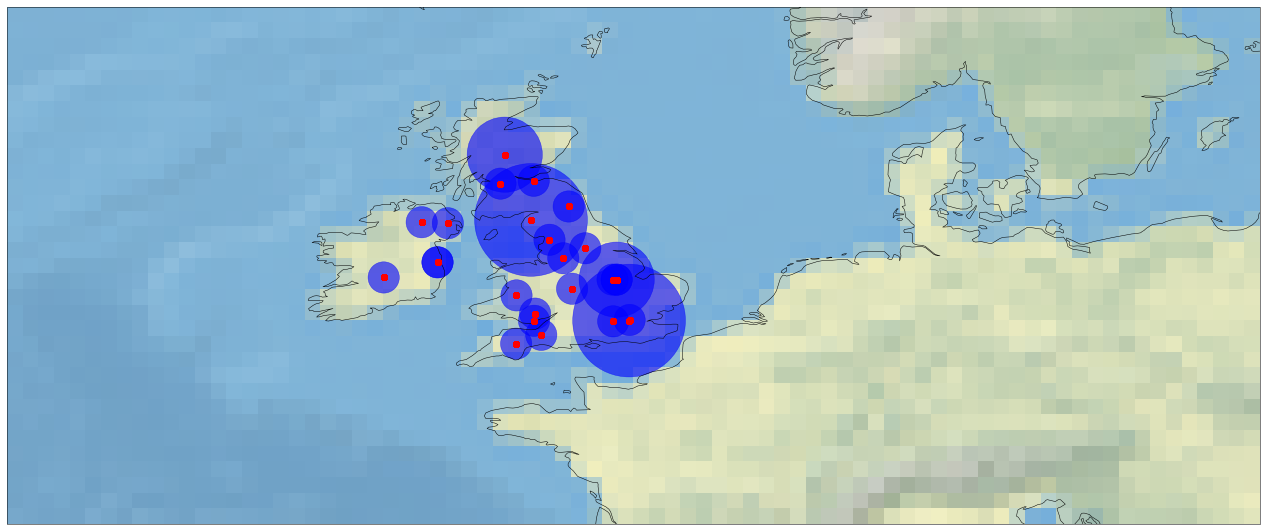

In [333]:
import cartopy.crs as ccrs
from matplotlib.patches import Circle

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

# plot individual locations                                                                                                       
ax.plot(mapdata.lon, mapdata.lat, 'ro', transform=ccrs.PlateCarree())

# add coastlines for reference                                                                                                
ax.coastlines(resolution='50m')
ax.set_global()
ax.set_extent([20, -20, 45,60])

# helper function
def get_radius(freq):
    if freq < 50:
        return 0.5
    elif freq < 200:
        return 1.2
    elif freq < 1000:
        return 1.8


# plot count of tweets per location
for i,x in locations.iteritems():
    ax.add_patch(Circle(xy=[i[2], i[1]], radius=get_radius(x), color='blue', alpha=0.6, transform=ccrs.PlateCarree()))

plt.show()

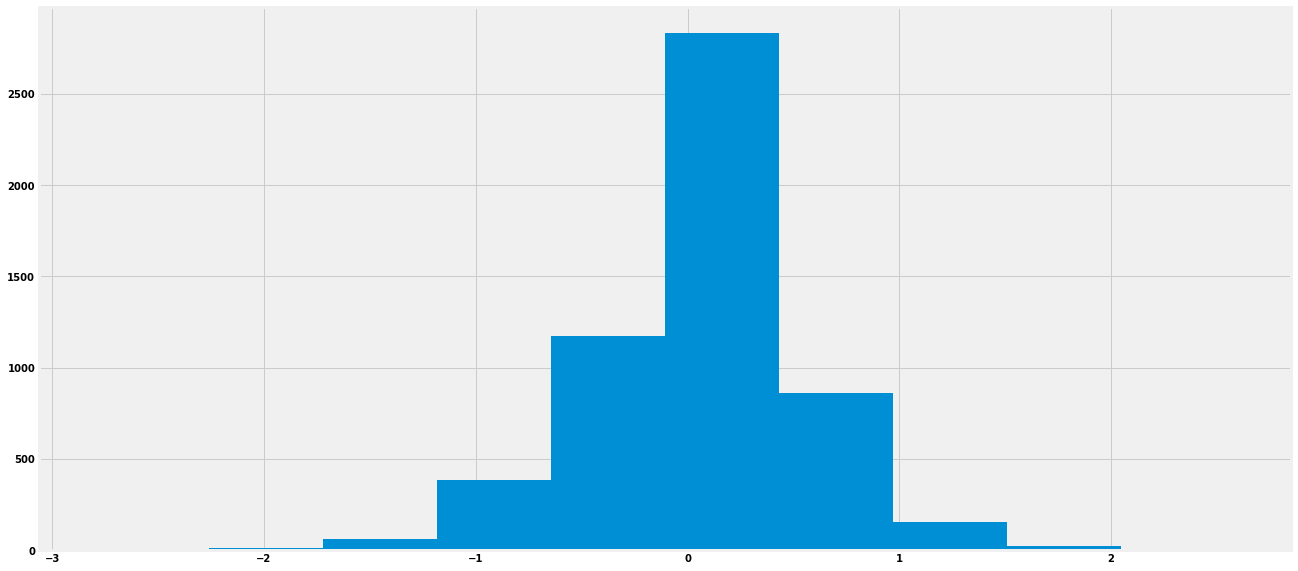

In [334]:
df['sentiment_score'].hist()

In [335]:
sent_clasification = pd.cut(df['sentiment_score'],\
          [-3,-1.2, 0, 1.2 , 3],\
          right=True,\
          include_lowest=True,\
          labels=['strongly negative', 'negative', 'positive', 'strongly positive'])

In [336]:
sent_clasification.value_counts()

negative             3273
positive             2082
strongly positive      89
strongly negative      76
Name: sentiment_score, dtype: int64

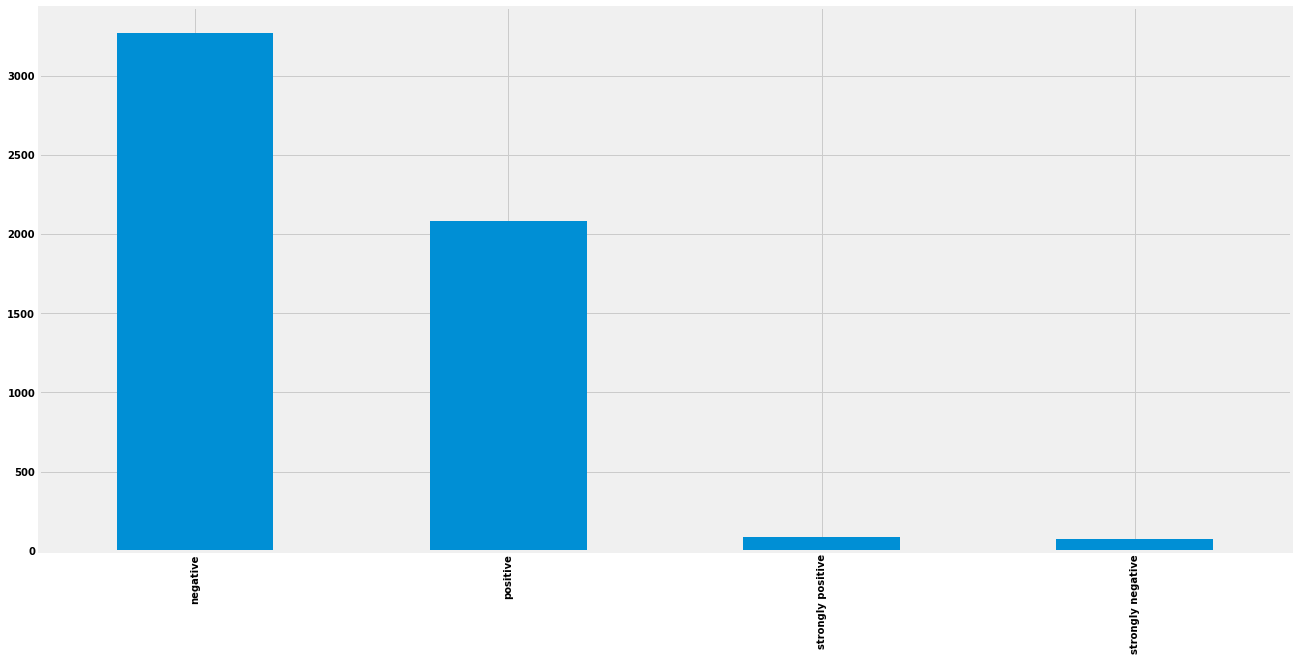

In [337]:
sent_clasification.value_counts().plot(kind='bar')

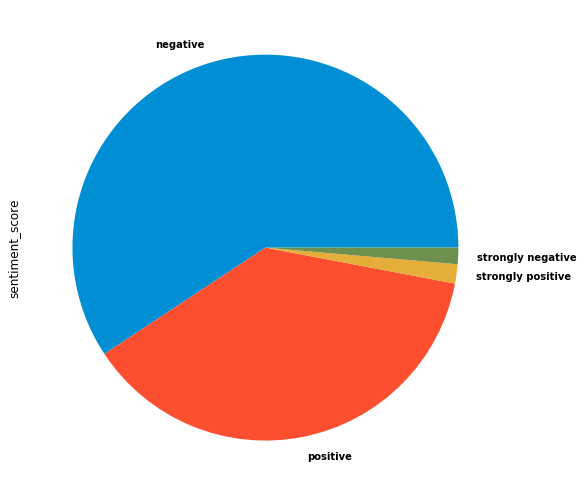

In [338]:
plt.figure(figsize=(10,7))
sent_clasification.value_counts().plot(kind='pie')
plt.grid(False)
plt.tight_layout()

### Word Cloud

Using our data, let's generate a wordcloud.

In [339]:
from wordcloud import WordCloud, STOPWORDS

In [340]:
bigstring = df['processed_text'].apply(lambda x: ' '.join(x)).str.cat(sep=' ')

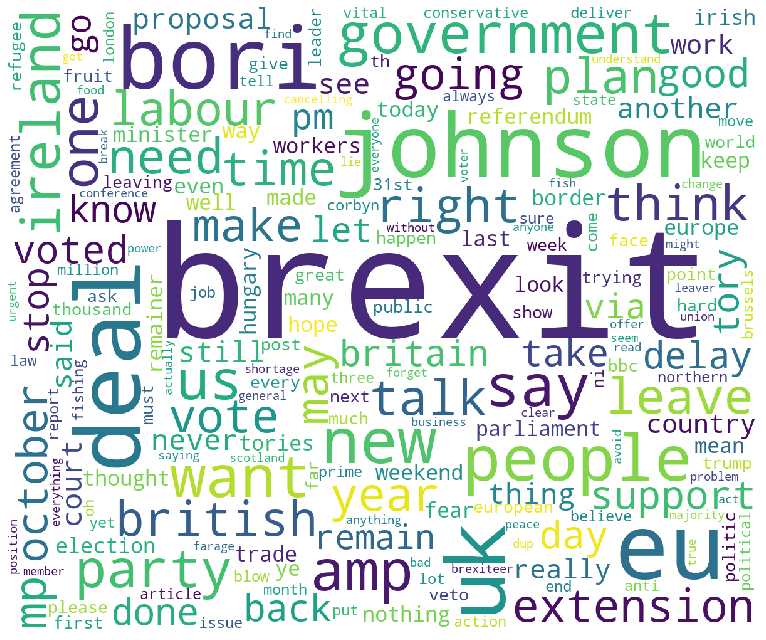

In [341]:
plt.figure(figsize=(12,12))
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1200,
                          height=1000
                         ).generate(bigstring)
plt.axis('off')
plt.imshow(wordcloud)

### Top Hashtags

These are the 20 most used hashtags in our result set.

In [342]:
import re
hashtags = df['text'].apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() )))\
                     .sum(axis=0)\
                     .to_frame()\
                     .reset_index()\
                     .sort_values(by=0,ascending=False)
hashtags.columns = ['hashtag','occurences']

In [343]:
hashtags.head(10)

,hashtag,occurences
59,#brexit,506.0
141,#eu,43.0
429,#uk,26.0
48,#borisjohnson,22.0
389,#stopbrexit,19.0
164,#finalsay,16.0
161,#fbpe,16.0
355,#remain,14.0
188,#getbrexitdone,13.0
27,#bbcqt,11.0


Text(0.5, 0.98, 'Top 10 Hashtags for keyword: BREXIT, locale: EN')

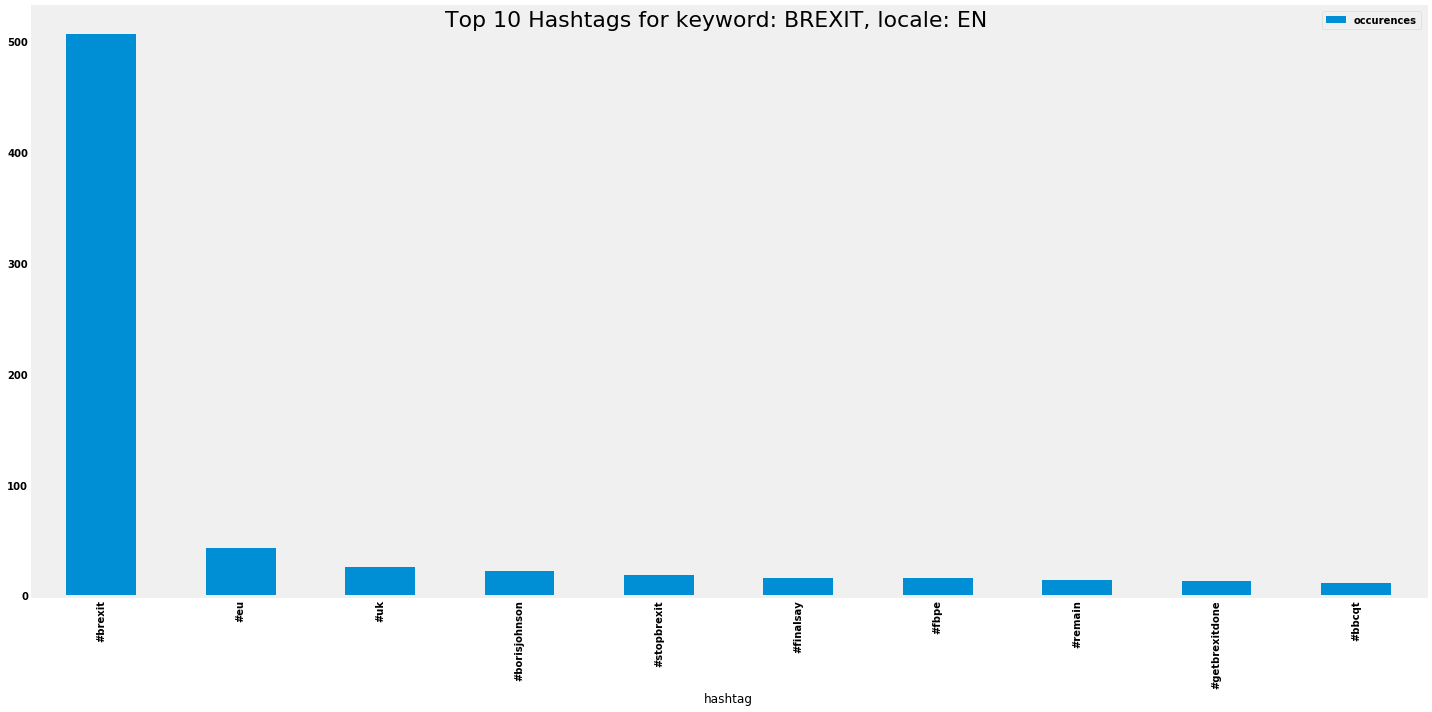

In [344]:
hashtags[:10].plot(kind='bar',y='occurences',x='hashtag')
plt.tight_layout()
plt.grid(False)
plt.suptitle('Top 10 Hashtags for keyword: BREXIT, locale: EN', fontsize=22)

### Top Users Mentioned

We are now going to plot the top 10 users that appear in tweets containing the term we've searched for.

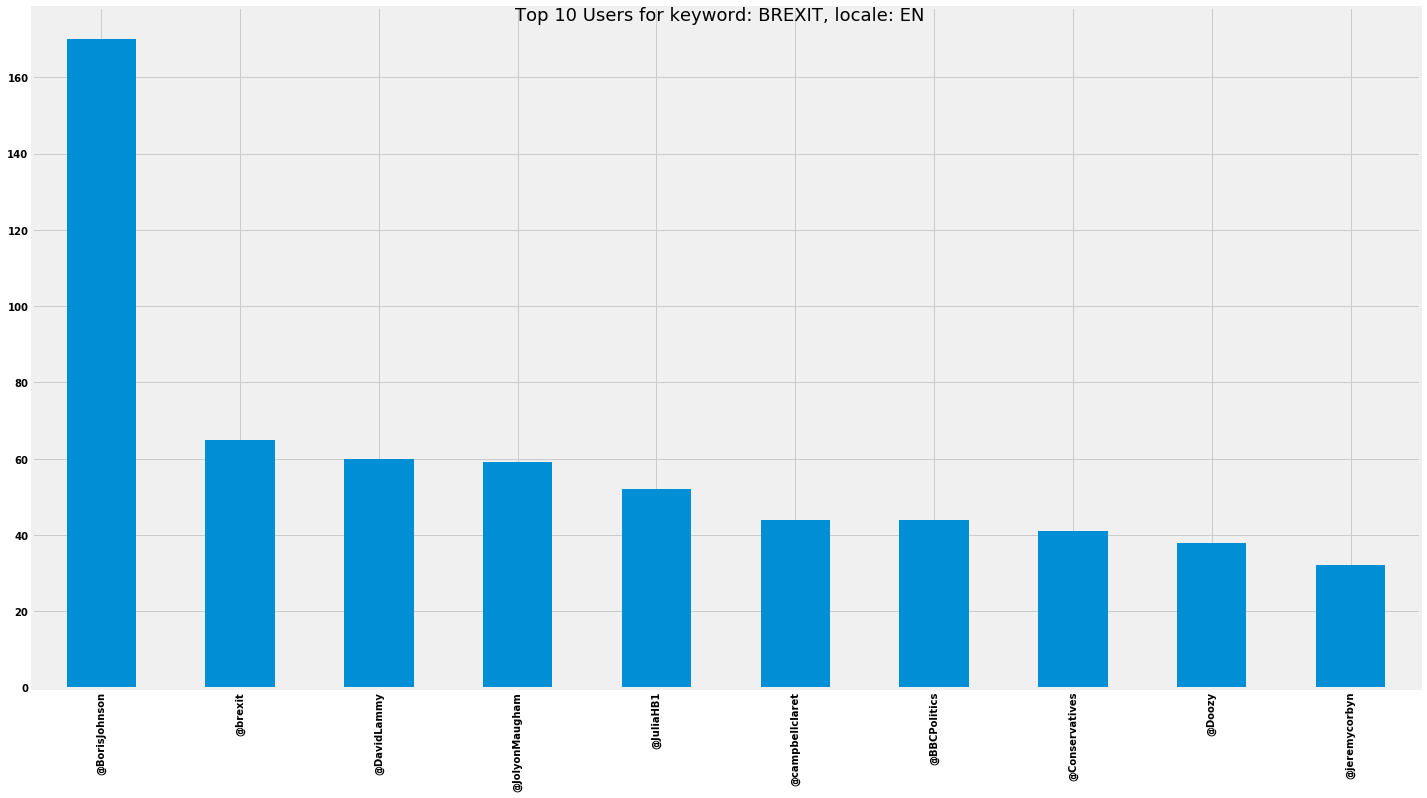

In [345]:
plt.grid(False)
plt.tight_layout()
plt.suptitle('Top 10 Users for keyword: BREXIT, locale: EN', fontsize=18)

df['text'].str\
          .findall('(@[A-Za-z0-9]+)')\
          .apply(lambda x: pd.value_counts(x))\
          .sum(axis=0)\
          .sort_values(ascending=False)[:10]\
          .plot(kind='bar')

### Top Words

Here is a list of the 20 most used words in the tweets containing the searched term.

In [346]:
words = df['processed_text'].dropna()\
                            .apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                            .sum(axis=0)\
                            .to_frame()\
                            .reset_index()\
                            .sort_values(by=0,ascending=False)
words.columns = ['word','occurences']

In [347]:
words.head(10)

,word,occurences
653,brexit,1345.0
2546,johnson,332.0
1236,deal,275.0
1664,eu,228.0
4822,uk,228.0
622,boris,194.0
2043,get,129.0
3359,people,125.0
4915,us,117.0
257,amp,116.0


Text(0.5, 0.98, 'Top 10 Words for keyword: BREXIT, locale: EN')

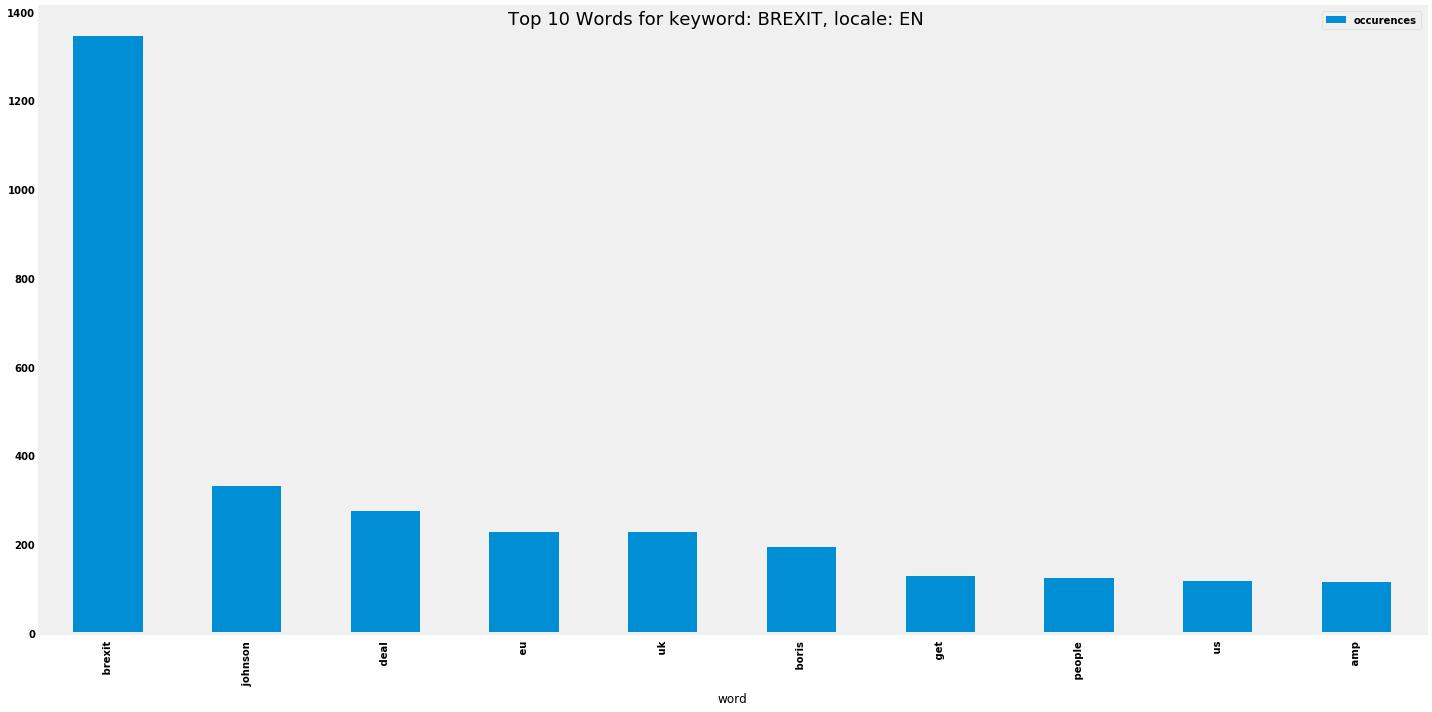

In [348]:
words[:10].plot(kind='bar',y='occurences',x='word')
plt.grid(False)
plt.tight_layout()
plt.suptitle('Top 10 Words for keyword: BREXIT, locale: EN', fontsize=18)

### Top Bigrams

A bigram is a pair of words. We're now going to look at the most occuring pairs of words in the result set.

In [357]:
from nltk import bigrams
bigramseries = pd.Series([word for sublist in df['processed_text'].dropna()\
                    .apply(lambda x: [i for i in bigrams(x)])\
                    .tolist() for word in sublist])\
                    .value_counts()

In [358]:
bigramseries.head(10)

(boris, johnson)       388
(deal, brexit)         203
(brexit, party)         90
(brexit, talks)         75
(brexit, done)          74
(get, brexit)           72
(brexit, extension)     64
(want, brexit)          60
(johnson, brexit)       59
(stop, brexit)          58
dtype: int64

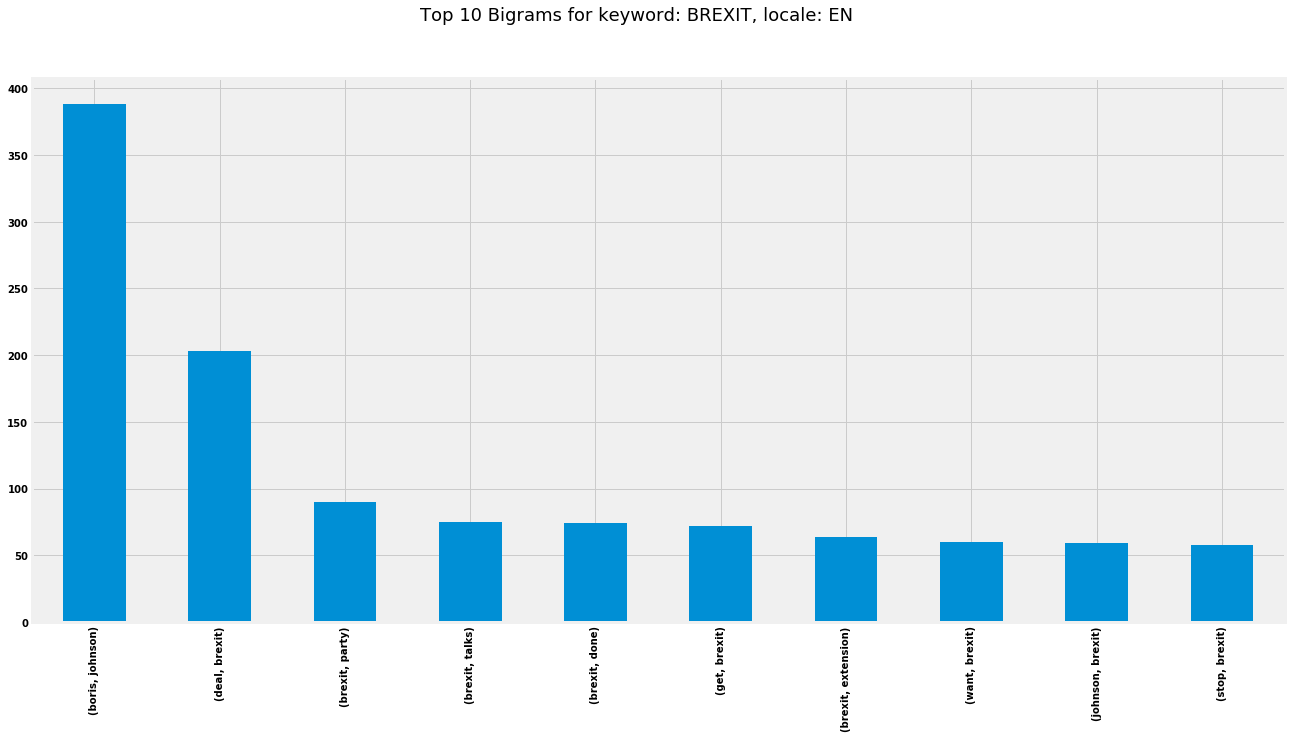

In [359]:
plt.suptitle('Top 10 Bigrams for keyword: BREXIT, locale: EN', fontsize=18)
bigramseries[:10].plot(kind='bar')